<a href="https://colab.research.google.com/github/sahba-zhsdt/Tools/blob/master/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning**

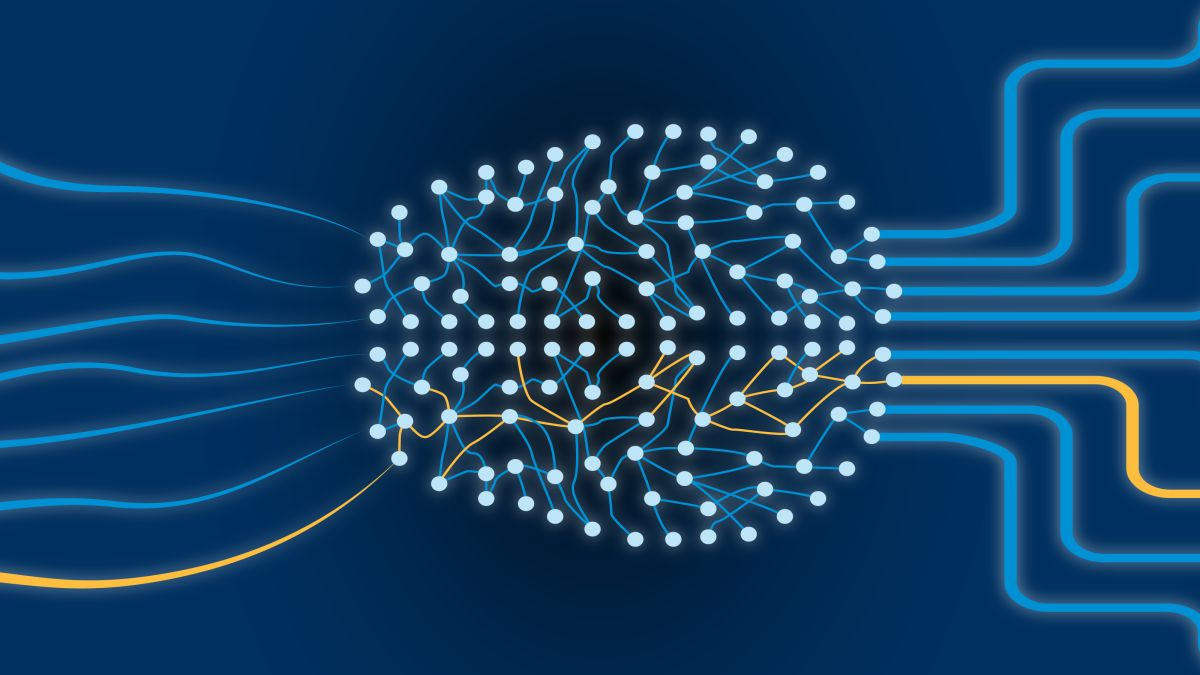

## Weight normalization (WN)

Weight normalization (WN) is a technique in deep learning that aims to improve the training and generalization of neural networks. It was introduced to address certain challenges associated with weight scaling and optimization. The key idea behind weight normalization is to decouple the magnitude of weights from their direction during optimization.

In a neural network, the weights associated with the connections between neurons can significantly impact the model's performance. Weight normalization reparameterizes the weights in a way that makes optimization more stable. The basic steps involved in weight normalization are as follows:

1. **Decomposition of Weights:**
   - The weight matrix \( W \) is decomposed into two parts: a scale parameter \( g \) and a direction parameter \( v \).
   - Each weight \( w_{ij} \) in the matrix is then represented as \( w_{ij} = g \cdot v_{ij} \).

2. **Normalization:**
   - The scale parameter \( g \) is a single scalar value that represents the magnitude or norm of the weight vector.
   - The direction parameter \( v \) is a normalized vector, meaning its magnitude is fixed to 1: \( \|v\| = 1 \).
   - The normalized weight is then \( \hat{w}_{ij} = g \cdot \frac{v_{ij}}{\|v\|} = g \cdot v_{ij} \).

3. **Optimization:**
   - During training, the scale parameter \( g \) and the direction parameter \( v \) are optimized separately.
   - This separation helps in stabilizing the learning process, as the scale can change the magnitude of weights without affecting the direction, making optimization more predictable.

Weight normalization can be applied to various layers in a neural network, including fully connected layers, convolutional layers, and recurrent layers.

The benefits of weight normalization include improved convergence during training, better generalization performance, and the ability to use higher learning rates without destabilizing optimization. It has been shown to be effective in various deep learning tasks and is often used in conjunction with other normalization techniques like batch normalization.

## LR Scheduler
* What does a learning rate scheduler do?\
A Learning rate schedule is a predefined framework that adjusts the learning rate between epochs or iterations as the training progresses.
* LambdaLR:\
In the context of deep learning, particularly with libraries like PyTorch, LambdaLR is a type of learning rate scheduler. Learning rate schedulers are used to adjust the learning rate during training to potentially improve the convergence and performance of the model.\
LambdaLR is a scheduler that allows you to specify a custom function (lambda function) to define how the learning rate changes over time. The general idea is that the learning rate can be adjusted differently at different epochs or steps.

> example:


In [ ]:
import torch
from torch.optim.lr_scheduler import LambdaLR

# Your initial learning rate
initial_lr = 0.1

# Define a custom lambda function for the learning rate schedule
lr_lambda = lambda epoch: 0.95 ** epoch

# Create a LambdaLR scheduler
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

# During training loop
for epoch in range(num_epochs):
    # Train your model

    # Update the learning rate at the end of each epoch
    scheduler.step()

## **what is AMP?**

AMP stands for Automatic Mixed Precision. It's a technique used in deep learning to speed up training and reduce memory usage by leveraging mixed precision arithmetic, particularly with half-precision floating-point numbers (float16), while maintaining the accuracy of the model.

## **pseudo epoch**

In the context of deep learning, a pseudo-epoch refers to a concept used in training procedures where the number of iterations (or steps) through the entire dataset is artificially inflated to create the appearance of multiple epochs without actually going through the entire dataset multiple times.

The term "pseudo-epoch" is often used in the context of techniques like learning rate schedulers or other training strategies that depend on the number of epochs. These techniques may adjust their behavior based on the number of iterations or steps rather than the actual number of complete passes through the dataset.

Here's why pseudo-epochs might be used and how they work:

1. **Efficiency**: In large-scale deep learning tasks, it may be computationally expensive to complete multiple full passes (epochs) through the entire dataset. Instead, practitioners may opt to perform a fixed number of iterations, covering only a fraction of the dataset each time.

2. **Regularization**: Pseudo-epochs can act as a form of regularization by introducing more variability into the training process. With each pseudo-epoch, the model sees a different subset of the data, which can help prevent overfitting.

3. **Learning Rate Scheduling**: Learning rate schedulers may be designed to change the learning rate based on the number of iterations rather than the number of epochs. For example, the learning rate might decrease after every pseudo-epoch or after a certain number of iterations.

4. **Logging and Reporting**: In training logs and reports, the concept of pseudo-epochs allows practitioners to track training progress and performance in terms of epochs, even if each "epoch" corresponds to a fraction of the dataset.

To summarize, a pseudo-epoch is a virtual unit of training progress that corresponds to a fixed number of iterations through a fraction of the dataset. It's a practical approach used to manage computational resources, introduce regularization, and coordinate training strategies based on the number of epochs.

$$ H_{out}= \left\lfloor \frac{H_{in} + 2\cdot \text{padding}[0] - \text{dilation}[0] \cdot (\text{kernel_size}[0] - 1) - 1}{\text{stride}[0]} + 1 \right\rfloor, $$ (cnn_height_out)

# **in training deep learning network, does validation process take place after every training epoch**

Yes, in typical deep learning training setups, the validation process often takes place after every training epoch. This practice is common for monitoring the performance of the model during training and for making decisions related to early stopping or adjusting hyperparameters.

Here's how the typical training process flows:

1. **Training Epoch**: During each training epoch, the model is trained on the training dataset. This involves forward pass (computing predictions), backward pass (computing gradients), and updating model parameters using an optimization algorithm (like stochastic gradient descent or its variants).

2. **Validation Step**: After completing a training epoch, the model's performance is evaluated on a separate validation dataset. This step involves running the validation dataset through the trained model without updating any parameters. The validation metrics, such as accuracy, loss, or other relevant metrics, are computed and recorded.

3. **Monitoring and Early Stopping**: The validation metrics are monitored over epochs. If the performance on the validation set starts to degrade (indicating overfitting), or if it doesn't improve beyond a certain threshold, training may be stopped early to prevent overfitting and save computational resources.

4. **Hyperparameter Tuning**: The validation metrics are also used for hyperparameter tuning, such as adjusting the learning rate, batch size, or model architecture. Researchers and practitioners often use techniques like grid search or random search to find optimal hyperparameters based on validation performance.

By performing validation after each training epoch, practitioners can closely monitor the model's performance and make necessary adjustments to improve generalization and prevent overfitting.

# **an example for customized collating to turn torch.Tensor into numpy arrays to ffed in JAX**

Certainly! This function is a custom collate function typically used in PyTorch or similar machine learning frameworks where you have to collate samples into batches for training or inference. Let's break down each part:

```python
def numpy_collate(batch):
    if isinstance(batch[0], np.ndarray):
        return np.stack(batch)
    elif isinstance(batch[0], (tuple,list)):
        transposed = zip(*batch)
        return [numpy_collate(samples) for samples in transposed]
    else:
        return np.array(batch)
```

1. **Function Definition**:
   - `def numpy_collate(batch):`: This line defines a function named `numpy_collate` which takes a single argument `batch`.

2. **Checking the Type of the First Element in the Batch**:
   - `if isinstance(batch[0], np.ndarray):`: This condition checks if the first element of the batch is a NumPy array. If it is, it assumes that all elements in the batch are NumPy arrays and stacks them along a new axis (default is axis 0) using `np.stack(batch)`.
   
3. **Checking for Nested Lists or Tuples**:
   - `elif isinstance(batch[0], (tuple,list)):`: If the first element of the batch is not a NumPy array, this condition checks if it is a tuple or a list.
   - `transposed = zip(*batch)`: This line transposes the batch of tuples or lists. For example, if `batch` is a list of tuples where each tuple contains elements at the same index from different samples, `zip(*batch)` would group the elements from the same index across all tuples together.
   - `return [numpy_collate(samples) for samples in transposed]`: This line recursively calls `numpy_collate` on each group of elements obtained after transposing the batch.
   
4. **Handling Other Data Types**:
   - `else:`: If the first element of the batch is neither a NumPy array nor a tuple/list, it assumes that all elements in the batch are scalars or simple data types.
   - `return np.array(batch)`: This line converts the batch into a NumPy array.

In summary, this `numpy_collate` function is designed to handle various types of input batches, including batches containing NumPy arrays, batches containing tuples or lists of data, and batches containing other data types. It recursively handles nested structures to ensure that the output is a properly collated batch suitable for further processing, such as feeding into a machine learning model.

# **Batch normalization**

Batch normalization is a technique used to improve the training of deep neural networks by reducing internal covariate shift, which refers to the changes in the distribution of network activations during training. This helps stabilize and accelerate the training process. Batch normalization was introduced by Sergey Ioffe and Christian Szegedy in their 2015 paper "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift."

### How Batch Normalization Works
Batch normalization is typically applied to the activations of a given layer in the network. The process involves the following steps:

1. **Calculate Mean and Variance**: For each mini-batch, calculate the mean and variance of the activations.
2. **Normalize**: Subtract the mean and divide by the square root of the variance (plus a small epsilon for numerical stability) to normalize the activations.
3. **Scale and Shift**: Apply a learnable scale parameter (gamma) and a learnable shift parameter (beta) to the normalized activations. This allows the network to retain the capacity to represent the original data distribution if necessary.

Mathematically, for an activation \( x \) in a mini-batch, batch normalization performs the following operations:

1. Compute the mean \(\mu_B\) and variance \(\sigma_B^2\) of the batch:
   \[
   \mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i, \quad \sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2
   \]
2. Normalize the activations:
   \[
   \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   \]
3. Scale and shift:
   \[
   y_i = \gamma \hat{x}_i + \beta
   \]
   Here, \(\gamma\) and \(\beta\) are learnable parameters that allow the network to restore the original distribution of activations if needed.

### Benefits of Batch Normalization
1. **Faster Training**: By reducing internal covariate shift, batch normalization allows for higher learning rates and faster convergence.
2. **Improved Gradient Flow**: It helps maintain stable gradients throughout the network, reducing the risk of vanishing or exploding gradients.
3. **Regularization Effect**: Batch normalization adds a slight regularization effect, reducing the need for other regularization techniques like dropout.
4. **Reduced Sensitivity to Initialization**: It makes the network less sensitive to the initial weights, simplifying the initialization process.
5. **Improved Generalization**: By stabilizing the learning process, it often leads to better generalization on the test set.

### Implementation in Popular Libraries

#### TensorFlow
```python
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
```

#### PyTorch
```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x
```

### Considerations
- **Batch Size**: The effectiveness of batch normalization can be influenced by the batch size. Too small a batch size may lead to noisy estimates of the mean and variance.
- **Training vs. Inference**: During training, batch statistics are used. During inference, moving averages of the mean and variance computed during training are used to ensure stable output.

Batch normalization is a powerful technique that has become a standard component in the architecture of many deep neural networks due to its ability to significantly improve training dynamics and performance.

## **what does it mean that embedding dimension is 256?**

An embedding dimension of 256 typically refers to the size of the vector space in which words or tokens are represented after being encoded through an embedding layer in a neural network.

In natural language processing (NLP) tasks, words are often represented as high-dimensional vectors, where each dimension corresponds to some feature or attribute of the word. For example, in word embeddings like Word2Vec or GloVe, each word is represented as a dense vector of real numbers. The number of dimensions in this vector space is referred to as the embedding dimension.

A higher embedding dimension means that each word or token is represented by a longer vector with more numerical values. This can potentially capture more nuanced relationships between words or tokens in the vector space, allowing the neural network to better understand and process language.

However, a higher embedding dimension also comes with computational costs, as it increases the number of parameters in the model, which can lead to longer training times and increased memory requirements. Therefore, the choice of embedding dimension is often a trade-off between model performance and computational efficiency, depending on the specific task and available resources.

## **Soft-thresholding**

Soft-thresholding is a technique used in signal processing, statistics, and machine learning, particularly in the context of regularization and denoising. It is a method to shrink coefficients towards zero by applying a threshold. Unlike hard-thresholding, which sets all coefficients below a certain threshold to zero, soft-thresholding reduces the magnitude of the coefficients more smoothly.

### Mathematical Definition

For a given threshold \(\lambda\) and a coefficient \(x\), the soft-thresholding function \(S_{\lambda}(x)\) is defined as:

\[ S_{\lambda}(x) = \text{sign}(x) \cdot \max(|x| - \lambda, 0) \]

In simpler terms:
- If \(x > \lambda\), \(S_{\lambda}(x) = x - \lambda\)
- If \(x < -\lambda\), \(S_{\lambda}(x) = x + \lambda\)
- If \(|x| \leq \lambda\), \(S_{\lambda}(x) = 0\)

### Applications of Soft-Thresholding

1. **Wavelet Denoising**: In signal and image processing, soft-thresholding is used in wavelet shrinkage methods to remove noise from signals or images. The wavelet coefficients are shrunk towards zero, reducing the impact of noise while preserving significant features.

2. **Lasso Regression**: In Lasso (Least Absolute Shrinkage and Selection Operator) regression, soft-thresholding is used to induce sparsity in the model coefficients. The Lasso objective includes an L1 penalty term, which effectively applies soft-thresholding to the coefficients during the optimization process.

3. **Compressed Sensing**: Soft-thresholding is utilized in compressed sensing to recover sparse signals from a small number of measurements. It helps in promoting sparsity in the signal representation.

### Example

Suppose we have a set of coefficients \([3, -1.5, 0.5, 4]\) and we apply a soft-thresholding with \(\lambda = 1\):
- For \(3\): \(S_1(3) = 3 - 1 = 2\)
- For \(-1.5\): \(S_1(-1.5) = -1.5 + 1 = -0.5\)
- For \(0.5\): \(S_1(0.5) = 0.5 - 1 = 0\) (since it's less than \(\lambda\))
- For \(4\): \(S_1(4) = 4 - 1 = 3\)

The resulting coefficients after soft-thresholding would be \([2, -0.5, 0, 3]\).

### Benefits

- **Noise Reduction**: Soft-thresholding helps in reducing noise in data by shrinking small coefficients that are likely to represent noise.
- **Sparsity**: It promotes sparsity, making the resulting models or representations more interpretable and efficient.
- **Smooth Transition**: Unlike hard-thresholding, soft-thresholding provides a smoother transition by gradually reducing the magnitude of coefficients rather than abruptly setting them to zero.

In summary, soft-thresholding is a powerful technique for achieving sparsity and reducing noise, widely used in various fields like signal processing, statistics, and machine learning.

## **torch.reshape vs. torch.permute**

`torch.reshape` and `torch.permute` are two different methods in PyTorch used to manipulate tensor shapes, but they serve different purposes and have different functionalities. Here’s a detailed comparison:

### `torch.reshape`
- **Purpose**: `torch.reshape` is used to change the shape of a tensor without changing its data.
- **Functionality**: It returns a tensor with the same data but a different shape. The number of elements in the new shape must match the number of elements in the original tensor.
- **Contiguity**: The tensor must be contiguous (i.e., stored in a single, contiguous chunk of memory) or it will make a copy of the tensor to make it contiguous.
- **Syntax**: `torch.reshape(tensor, shape)`
- **Example**:
    ```python
    import torch
    
    x = torch.tensor([[1, 2, 3], [4, 5, 6]])
    reshaped_x = torch.reshape(x, (3, 2))
    print(reshaped_x)
    ```
    Output:
    ```
    tensor([[1, 2],
            [3, 4],
            [5, 6]])
    ```

### `torch.permute`
- **Purpose**: `torch.permute` is used to permute the dimensions of a tensor.
- **Functionality**: It returns a tensor with the same data but with the dimensions rearranged in the specified order. It is commonly used for changing the order of dimensions, such as converting between different image formats (e.g., from (batch, height, width, channels) to (batch, channels, height, width)).
- **Contiguity**: The tensor does not need to be contiguous. `torch.permute` does not change the memory layout of the tensor.
- **Syntax**: `torch.permute(tensor, dims)`
- **Example**:
    ```python
    import torch
    
    x = torch.tensor([[[1, 2, 3], [4, 5, 6]]])
    permuted_x = torch.permute(x, (0, 2, 1))
    print(permuted_x)
    ```
    Output:
    ```
    tensor([[[1, 4],
             [2, 5],
             [3, 6]]])
    ```

### Key Differences:
- **Reshape**: Changes the shape by specifying a new shape that matches the number of elements. It doesn’t change the order of elements in memory.
- **Permute**: Changes the order of dimensions but keeps the same data and number of elements. It’s useful for tasks like converting between image data formats or changing the order of dimensions for matrix operations.

### When to Use:
- Use `torch.reshape` when you need to change the shape of a tensor without altering the order of elements, such as flattening a tensor or changing it to a different but compatible shape.
- Use `torch.permute` when you need to reorder the dimensions of a tensor, such as converting between different data format conventions or preparing tensors for operations that expect a certain dimension order.

Understanding these differences can help you manipulate tensors effectively for various deep learning tasks.